# Description du projet
Le projet s'intéresse au prix de l'immobilier sur Paris. Est-on en mesure d'avoir une bonne prédiction sur la valeur mobilière d'un bien

# Lecture des jeux de données
Les jeux de données sont disponibles sur https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Fonction pour lire les donnnées en fonction du fichier
def ReadFile(nomFile, delimiter = '|'):
    # lecture du fichier excel
    df = pd.read_csv(nomFile, delimiter = delimiter, low_memory = False)
    print("taille du jeu de donnees :", df.shape)
    return df
    
    

In [3]:
# Fonction pour extraire les données à partir d'un numéro de département
def ExtractDepartement(df, numDep):
    df['code_departement'].astype(str)
    df['Validation'] = (df['code_departement'] == numDep )
    dfDep = df[df['Validation']==True]
    dfDep = dfDep.drop('Validation', axis=1)
    print("Departement : {0}".format(numDep))
    print("Taille du jeu de donnees", dfDep.shape)
    return dfDep       

In [4]:
df1 = ReadFile("../input/AvecCoordonneesGeo/full.csv", ',')

taille du jeu de donnees : (1429093, 40)


In [5]:
df2 = ReadFile("../input/AvecCoordonneesGeo/full2021.csv", ',')

taille du jeu de donnees : (4375223, 40)


## Concaténation des données

In [6]:
#Concaténation des deux jeux de données
df = pd.concat([df1,df2])
#,keys=['2022','2021'])
#, names = ['FileInput', 'RowId'])
print("taille suite à union :", df.shape)

taille suite à union : (5804316, 40)


## Réduction à un département

In [7]:
dfDep = ExtractDepartement(df,'75')
dfDepIni = dfDep
# Enlever le commentaire pour générer le jeu de données pour Power BI
#dfDepIni.to_csv('../input/AvecCoordonneesGeo/dep752.csv')

Departement : 75
Taille du jeu de donnees (130696, 40)


# Nettoyage du jeu de données

## Nettoyage 

In [8]:
#Suppression des longitudes et latitudes null
dfDep.drop(dfDep[(dfDep['longitude'].isnull()) | (dfDep['latitude'].isnull())].index, inplace=True)
dfDep.shape

(130653, 40)

In [9]:
#Suppression des données où la valeur foncière est null
dfDep.drop(dfDep[dfDep['valeur_fonciere'].isnull() ].index, inplace=True)
dfDep.shape


(127389, 40)

In [10]:
#Suppression des valeurs foncières < 50KE et >3000KE
dfDep.drop(dfDep[dfDep['valeur_fonciere']<50000 ].index, inplace=True)
dfDep.drop(dfDep[dfDep['valeur_fonciere']>3000000 ].index, inplace=True)
dfDep.shape

(103617, 40)

In [11]:
#Suppression des variables qui sont nulles pour 80% des valeurs
listVariables = dfDep.isnull().sum() > (dfDep.shape[0]*0.8)
listResultatsVarDrop = []
for colname, serie in listVariables.iteritems():
    if(serie == True):
            listResultatsVarDrop.append(colname)
listResultatsVarDrop
dfDep.drop(listResultatsVarDrop, inplace=True, axis=1)
dfDep.shape

(103617, 23)

In [12]:
dfDep.head(10)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,...,lot1_numero,lot1_surface_carrez,lot2_numero,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
1379721,2022-514000,2022-01-04,1,Vente,580000.0,13.0,RUE DE SOFIA,9002,75018.0,75118,...,55,61.00,58,3,3.0,Dépendance,NaN,0.0,2.348168,48.884490
1379722,2022-514000,2022-01-04,1,Vente,580000.0,13.0,RUE DE SOFIA,9002,75018.0,75118,...,25,NaN,56,2,2.0,Appartement,20.0,2.0,2.348168,48.884490
1379723,2022-514000,2022-01-04,1,Vente,580000.0,13.0,RUE DE SOFIA,9002,75018.0,75118,...,55,61.00,58,3,2.0,Appartement,25.0,2.0,2.348168,48.884490
1379724,2022-514000,2022-01-04,1,Vente,580000.0,13.0,RUE DE SOFIA,9002,75018.0,75118,...,25,NaN,56,2,3.0,Dépendance,NaN,0.0,2.348168,48.884490
1379725,2022-514001,2022-01-06,1,Vente,605000.0,51.0,RUE CHARLOT,1880,75003.0,75103,...,7,40.66,NaN,1,2.0,Appartement,42.0,3.0,2.362871,48.863374
1379726,2022-514001,2022-01-06,1,Vente,605000.0,51.0,RUE CHARLOT,1880,75003.0,75103,...,13,NaN,14,2,3.0,Dépendance,NaN,0.0,2.362871,48.863374
1379727,2022-514001,2022-01-06,1,Vente,605000.0,51.0,RUE CHARLOT,1880,75003.0,75103,...,7,40.66,NaN,1,3.0,Dépendance,NaN,0.0,2.362871,48.863374
1379730,2022-514004,2022-01-05,1,Vente,716250.0,6.0,RUE PAUL ESCUDIER,7155,75009.0,75109,...,24,NaN,3,3,3.0,Dépendance,NaN,0.0,2.332324,48.880353
1379731,2022-514004,2022-01-05,1,Vente,716250.0,6.0,RUE PAUL ESCUDIER,7155,75009.0,75109,...,24,NaN,3,3,3.0,Dépendance,NaN,0.0,2.332324,48.880353
1379732,2022-514004,2022-01-05,1,Vente,716250.0,6.0,RUE PAUL ESCUDIER,7155,75009.0,75109,...,24,NaN,3,3,2.0,Appartement,69.0,3.0,2.332324,48.880353


## Gestion des doublons

In [13]:
#Suppression des lignes en doublon
dfDep.drop_duplicates(inplace=True)
dfDep.shape

(99407, 23)

In [14]:
#Conversion des objets en string
dfDep['id_mutation'] = dfDep['id_mutation'].astype("string")
dfDep.info()
#id mutation unique
dfDep["id_mutation"].drop_duplicates(inplace=True)
print(dfDep.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99407 entries, 1379721 to 4375222
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                99407 non-null  string 
 1   date_mutation              99407 non-null  object 
 2   numero_disposition         99407 non-null  int64  
 3   nature_mutation            99407 non-null  object 
 4   valeur_fonciere            99407 non-null  float64
 5   adresse_numero             99119 non-null  float64
 6   adresse_nom_voie           99126 non-null  object 
 7   adresse_code_voie          99126 non-null  object 
 8   code_postal                99126 non-null  float64
 9   code_commune               99407 non-null  object 
 10  nom_commune                99407 non-null  object 
 11  code_departement           99407 non-null  object 
 12  id_parcelle                99407 non-null  object 
 13  lot1_numero                98317 non-n

In [15]:
def AggregationSimilarData(df):
    
    # Construction d'un dictionnaire 
    # où la clé est la chaine de caractère qui permet d'indiquer que deux lignes sont similaires
    # où la valeur est l'index dans le dataframe initial
    dict_similarData = {}
    for index,series in df.iterrows():
        keyRow = str(series['date_mutation'])+'_'+str(series['valeur_fonciere'])+'_'+series['adresse_complete']
        if keyRow in dict_similarData:
            listIndexSimilaire = dict_similarData[keyRow]
            listIndexSimilaire.append(index)
        else:
            listKeyRow = list();
            listKeyRow.append(index)
            dict_similarData[keyRow] = listKeyRow
    
    #Suppression des valeurs dupliquées en prenant comme surface_reelle_bati le cumulé des surfaces
    listIndexASupprimer = []
    for cle,listIndex in dict_similarData.items():
        if(len(listIndex)>1):
            valSurfaceAgregee = df.at[listIndex[0],"surface_reelle_bati"]
            val = 1
            while (val != len(listIndex)):
                listIndexASupprimer.append(listIndex[val])
                valSurfaceAgregee += df.at[listIndex[val],"surface_reelle_bati"]
                val += 1
            df.at[listIndex[0],"surface_reelle_bati"] = valSurfaceAgregee
    #print(listIndexASupprimer)
    df.drop(listIndexASupprimer, inplace = True, axis = 0)
    print(df.shape)


In [16]:
#Suppression des données où le type de local est une dépendance. Il n'y a pas de surface_reelle_bati associé
dfDep.drop(dfDep[dfDep['type_local']== 'Dépendance' ].index, inplace=True)
dfDep.shape

(59625, 23)

In [17]:
#Conversion des objets en string
dfDep['adresse_nom_voie'] = dfDep['adresse_nom_voie'].astype("string")
dfDep['adresse_numero'] = dfDep['adresse_numero'].astype("string")
dfDep['nom_commune'] = dfDep['nom_commune'].astype("string")
dfDep['adresse_complete']=dfDep['adresse_numero']+' '+dfDep['adresse_nom_voie']+' , '+dfDep['nom_commune']

In [18]:
# Agréger si pour une même date de mutation, un même prix, une même adresse : agréger le champ surface_reelle_bati. 
# Ex : 13 rue de Sofia, 75018 le 4/01 pour 580KE avec une surface agrégée de 45m2 
AggregationSimilarData(dfDep)

(54289, 24)


## Gestion des variables catégorielles
On regarde les valeurs uniques pour identifier les variables catégorielles

In [19]:
for colname, serie in dfDep.iteritems():
    print(colname + " has " + str(serie.drop_duplicates().shape[0]) + " unique values.")

id_mutation has 54084 unique values.
date_mutation has 453 unique values.
numero_disposition has 3 unique values.
nature_mutation has 5 unique values.
valeur_fonciere has 15118 unique values.
adresse_numero has 376 unique values.
adresse_nom_voie has 3429 unique values.
adresse_code_voie has 3419 unique values.
code_postal has 21 unique values.
code_commune has 20 unique values.
nom_commune has 20 unique values.
code_departement has 1 unique values.
id_parcelle has 25386 unique values.
lot1_numero has 1872 unique values.
lot1_surface_carrez has 10423 unique values.
lot2_numero has 1875 unique values.
nombre_lots has 18 unique values.
code_type_local has 4 unique values.
type_local has 4 unique values.
surface_reelle_bati has 497 unique values.
nombre_pieces_principales has 16 unique values.
longitude has 22986 unique values.
latitude has 21254 unique values.
adresse_complete has 26739 unique values.


In [20]:
dfDep["nature_mutation"] = pd.Categorical(dfDep["nature_mutation"], ordered=False)
dfDep["type_local"] = pd.Categorical(dfDep["type_local"], ordered=False)
dfDep["nombre_pieces_principales"] = pd.Categorical(dfDep["nombre_pieces_principales"], ordered=False)
dfDep["nom_commune"] = pd.Categorical(dfDep["nom_commune"], ordered=False)


In [21]:
#Suppression des variables qui semblent inutiles
dfDep.drop(['id_mutation','code_departement', 'code_postal', 'adresse_code_voie', 'code_commune', 'id_parcelle','lot1_numero','lot2_numero', 'code_type_local'], inplace=True, axis=1)
dfDep.shape

(54289, 15)

## Typage des variables

In [22]:
dfDep['date_mutation'] = pd.to_datetime(dfDep['date_mutation'], format='%Y/%m/%d')

In [23]:
dfDep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54289 entries, 1379722 to 4375222
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_mutation              54289 non-null  datetime64[ns]
 1   numero_disposition         54289 non-null  int64         
 2   nature_mutation            54289 non-null  category      
 3   valeur_fonciere            54289 non-null  float64       
 4   adresse_numero             54288 non-null  string        
 5   adresse_nom_voie           54288 non-null  string        
 6   nom_commune                54289 non-null  category      
 7   lot1_surface_carrez        32599 non-null  float64       
 8   nombre_lots                54289 non-null  int64         
 9   type_local                 53930 non-null  category      
 10  surface_reelle_bati        53912 non-null  float64       
 11  nombre_pieces_principales  53929 non-null  category      
 

# Exploration 

## Description univariée

### La variable de temps
On effectue du feature engineering

In [24]:
dfDep['month']=dfDep["date_mutation"].apply(lambda x: x.month)
dfDep['day'] = dfDep["date_mutation"].apply(lambda x: x.day)
dfDep['year'] = dfDep["date_mutation"].apply(lambda x: x.year)
dfDep["month"] = pd.Categorical(dfDep["month"], ordered=True)
dfDep["day"] = pd.Categorical(dfDep["day"], ordered=True)
dfDep["year"]= pd.Categorical(dfDep["year"], ordered=True)

On va représenter les variables catégorielles à travers des tableaux de contingence ou des bars plots

In [25]:
dfDep["year"].value_counts()

2021    35393
2022    18896
Name: year, dtype: int64

On observe qu'on a pratiquement le double de données entre 2021 et 2022 ce qui est normal car on a une vision partielle de 2022 avec des données jusqu'à Juin

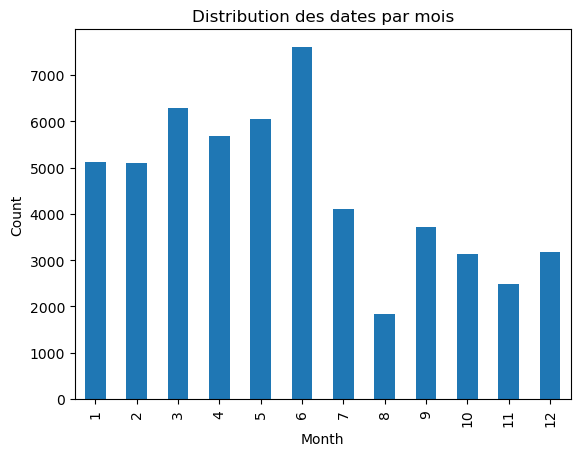

In [26]:
dfDep["month"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution des dates par mois")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

On retrouve les données partielles. Par contre, il apparait difficile de faire des conclusions sur les mois hormi que le mois d'août semble relativement faible ce qui peut s'expliquer car les personnes sont en vacances

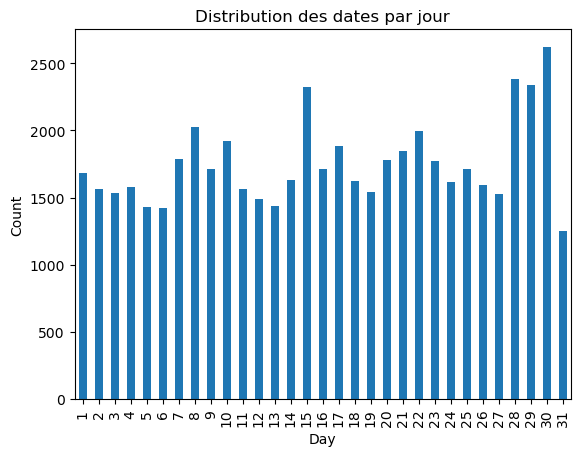

In [27]:
dfDep["day"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution des dates par jour")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

Il semblerait qu'il y ait plus de ventes en milieu et fin de mois

### La cible de notre modèle

In [28]:
dfDep["valeur_fonciere"].describe()

count    5.428900e+04
mean     6.115892e+05
std      4.902127e+05
min      5.000000e+04
25%      2.920000e+05
50%      4.585697e+05
75%      7.550000e+05
max      3.000000e+06
Name: valeur_fonciere, dtype: float64

<AxesSubplot:xlabel='valeur_fonciere'>

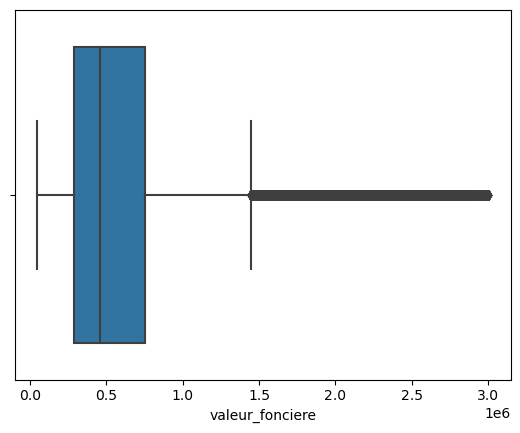

In [29]:
sns.boxplot(x=dfDep['valeur_fonciere'])

On a clairement des problèmes d'échelle avec des outliers à supprimer

In [30]:
#Methode Remove outliers pour une loi biaisée
def removeOutliers(variable):
    print("avant ", dfDep.shape)
    Q1 = dfDep[variable].quantile(0.25)
    Q3 = dfDep[variable].quantile(0.75)
    IQR = Q3 - Q1
    dfDep.drop(dfDep[(dfDep[variable]<Q1 - 1.5*IQR) | (dfDep[variable]>Q3 + 1.5*IQR)].index, inplace=True)
    print("après ",dfDep.shape)

In [31]:
removeOutliers('valeur_fonciere')

avant  (54289, 18)
après  (50446, 18)


In [32]:
#Methode Remove outliers par une loi normale
#Mean = dfDep['valeur_fonciere'].mean()
#StandardDeviation = dfDep['valeur_fonciere'].std()
#dfDep.drop(dfDep[(dfDep['valeur_fonciere']<Mean - 3*StandardDeviation) | (dfDep['valeur_fonciere']>Mean + 3*StandardDeviation)].index, inplace=True)
#dfDep.shape

count    5.044600e+04
mean     5.078709e+05
std      3.049878e+05
min      5.000000e+04
25%      2.800000e+05
50%      4.300000e+05
75%      6.700000e+05
max      1.449300e+06
Name: valeur_fonciere, dtype: float64

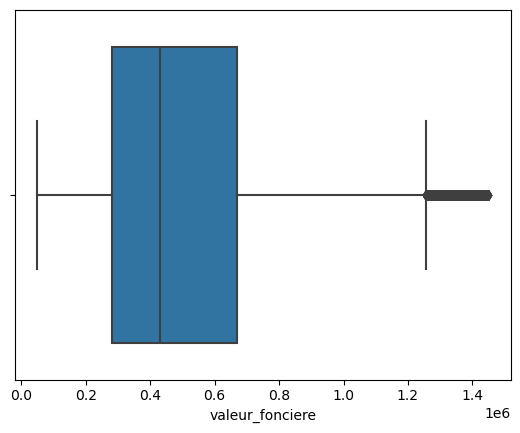

In [33]:
sns.boxplot(x=dfDep['valeur_fonciere'])
dfDep['valeur_fonciere'].describe()

### Les autres variables quantitatives

In [34]:
dfDep.describe()

,numero_disposition,valeur_fonciere,lot1_surface_carrez,nombre_lots,surface_reelle_bati,longitude,latitude
count,50446.000000,5.044600e+04,30741.000000,50446.000000,50112.000000,50446.000000,50446.000000
mean,1.002795,5.078709e+05,45.776034,1.675534,51.898567,2.342636,48.862166
std,0.053541,3.049878e+05,61.569145,0.824916,66.661178,0.037447,0.020222
min,1.000000,5.000000e+04,1.000000,0.000000,2.000000,2.255896,48.818759
25%,1.000000,2.800000e+05,25.580000,1.000000,28.000000,2.316022,48.845022
50%,1.000000,4.300000e+05,38.750000,2.000000,43.000000,2.345814,48.862759
75%,1.000000,6.700000e+05,59.270000,2.000000,65.000000,2.373166,48.880174
max,3.000000,1.449300e+06,7392.000000,34.000000,7842.000000,2.412825,48.900565


count     50112.000000
mean      10639.642826
std        3691.344154
min          24.323322
25%        9000.000000
50%       10557.634033
75%       12117.835294
max      130000.000000
Name: prix m2, dtype: float64

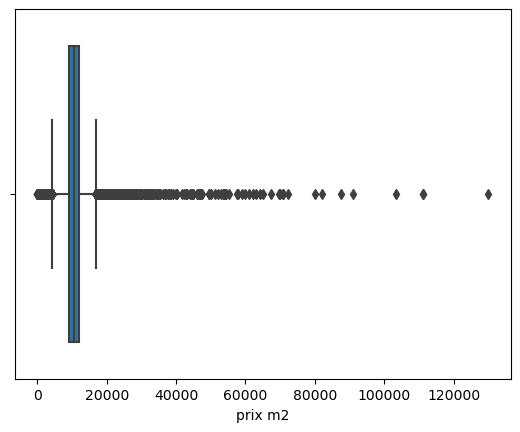

In [35]:
dfDep["prix m2"]=dfDep["valeur_fonciere"]/dfDep["surface_reelle_bati"]
sns.boxplot(x=dfDep['prix m2'])
dfDep["prix m2"].describe()

In [36]:
removeOutliers("prix m2")

avant  (50446, 19)
après  (47154, 19)


,numero_disposition,valeur_fonciere,lot1_surface_carrez,nombre_lots,surface_reelle_bati,longitude,latitude,prix m2
count,47154.000000,4.715400e+04,29010.000000,47154.000000,46820.000000,47154.000000,47154.000000,46820.000000
mean,1.002312,5.095385e+05,45.737030,1.679751,49.006279,2.343005,48.862179,10560.249890
std,0.048899,2.988223e+05,62.355009,0.779361,28.651969,0.037685,0.020387,2317.756634
min,1.000000,5.000000e+04,1.000000,0.000000,4.000000,2.255896,48.818759,4326.923077
25%,1.000000,2.870000e+05,25.840000,1.000000,28.000000,2.316104,48.844722,9146.073718
50%,1.000000,4.330000e+05,38.940000,2.000000,42.000000,2.346336,48.862890,10566.666667
75%,1.000000,6.686625e+05,59.220000,2.000000,64.000000,2.373824,48.880446,12000.000000
max,3.000000,1.449300e+06,7392.000000,16.000000,300.000000,2.412825,48.900565,16791.044776


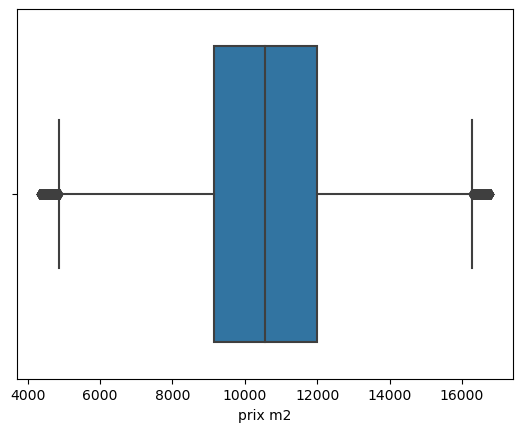

In [37]:
dfDep["prix m2"]=dfDep["valeur_fonciere"]/dfDep["surface_reelle_bati"]
sns.boxplot(x=dfDep['prix m2'])
dfDep.describe()

avant  (47154, 19)
après  (46482, 19)


,numero_disposition,valeur_fonciere,lot1_surface_carrez,nombre_lots,surface_reelle_bati,longitude,latitude,prix m2
count,46482.000000,4.648200e+04,28338.000000,46482.000000,46149.000000,46482.000000,46482.000000,46149.000000
mean,1.002302,4.996812e+05,43.209783,1.676864,47.905610,2.343216,48.862159,10570.283401
std,0.048814,2.883507e+05,23.095905,0.774179,27.152457,0.037587,0.020415,2317.846738
min,1.000000,5.000000e+04,1.000000,0.000000,4.000000,2.255896,48.818759,4326.923077
25%,1.000000,2.850000e+05,25.530000,1.000000,28.000000,2.316626,48.844628,9155.172414
50%,1.000000,4.290000e+05,38.160000,2.000000,42.000000,2.346446,48.862869,10573.333333
75%,1.000000,6.530150e+05,57.170000,2.000000,63.000000,2.373929,48.880462,12000.000000
max,3.000000,1.449200e+06,109.270000,16.000000,300.000000,2.412825,48.900565,16791.044776


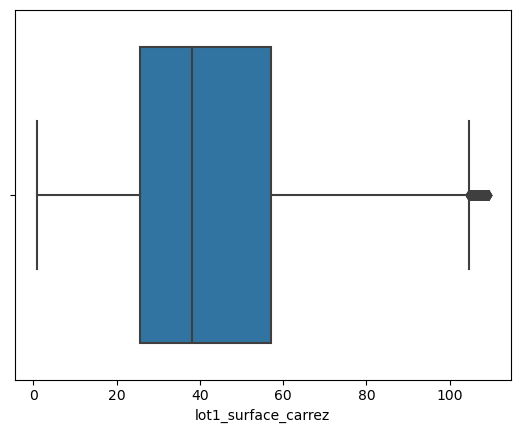

In [38]:
removeOutliers("lot1_surface_carrez")
sns.boxplot(x=dfDep['lot1_surface_carrez'])
dfDep.describe()

Les données sur les variables quantitatives semblent cohérentes en terme de grandeur suite à différentes suppressions des données atypiques.

In [39]:
dfDep.drop(["prix m2"],inplace=True,axis=1)

### Les variables catégorielles

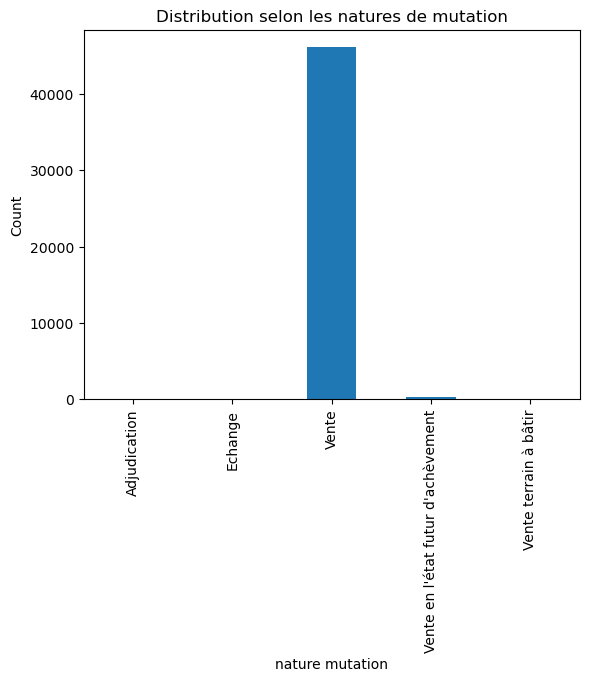

In [40]:
dfDep["nature_mutation"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution selon les natures de mutation")
plt.xlabel("nature mutation")
plt.ylabel("Count")
plt.show()



La plupart des biens sont des ventes. On va pouvoir supprimer cette variable

In [41]:
dfDep.drop(['nature_mutation'], inplace=True, axis=1)

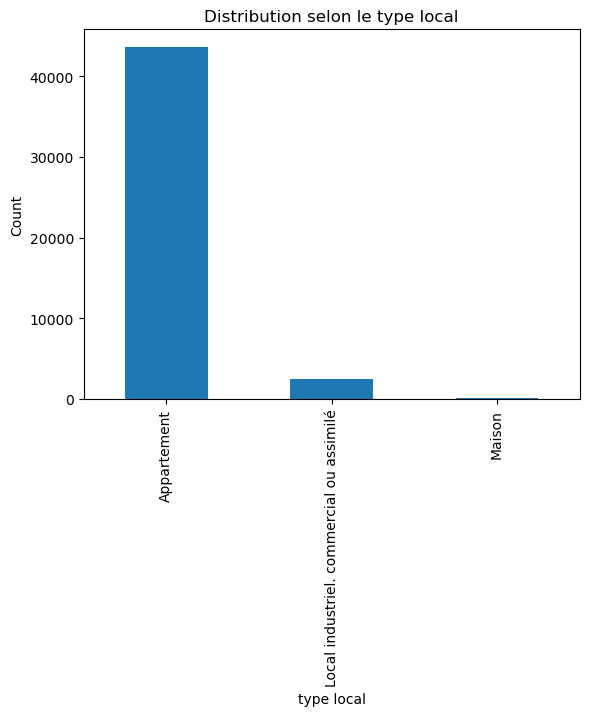

In [42]:
dfDep["type_local"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution selon le type local")
plt.xlabel("type local")
plt.ylabel("Count")
plt.show()

On peut se poser la question de la pertinence de cette variable car on a essentiellement deux modalités qui jouent

In [43]:
dfDep["nombre_pieces_principales"].value_counts()

2.0     16205
1.0     12097
3.0     10428
4.0      3958
0.0      2512
5.0       846
6.0        89
7.0        13
8.0         6
9.0         1
10.0        1
13.0        1
15.0        1
17.0        1
11.0        0
Name: nombre_pieces_principales, dtype: int64

Ce champs apparait mal instancié avec des valeurs abberantes

In [44]:
dfDep.drop(['nombre_pieces_principales'], inplace=True, axis=1)

In [45]:
dfDep["nom_commune"].value_counts()

Paris 18e Arrondissement    5247
Paris 15e Arrondissement    5173
Paris 11e Arrondissement    4162
Paris 17e Arrondissement    3960
Paris 20e Arrondissement    3318
Paris 16e Arrondissement    3209
Paris 19e Arrondissement    2845
Paris 12e Arrondissement    2785
Paris 10e Arrondissement    2691
Paris 14e Arrondissement    2493
Paris 13e Arrondissement    2410
Paris 9e Arrondissement     1811
Paris 5e Arrondissement     1181
Paris 3e Arrondissement      956
Paris 7e Arrondissement      882
Paris 6e Arrondissement      798
Paris 8e Arrondissement      743
Paris 2e Arrondissement      740
Paris 4e Arrondissement      676
Paris 1er Arrondissement     402
Name: nom_commune, dtype: int64

### Conclusion sur l'analyse univariée

On a pu voir que :
* le jeu de données est constituée d'un an et demi d'historique
* la target a été retravaillé pour éliminer les valeurs aberrantes. Il reste néanmoins des points atypiques sur le boxplot
* on a rationnalisé certaines variables en enlevant des valeurs aberrantes ou en les éliminant de l'analyse pour certaines varaibles catégorielles.
* on a introduit du feature ingeenering sur les dates

## Analyse bivariée

L'analyse bivariée va consister à regarder l'influence de différentes variables sur la variable cible.

### Les variables catégorielles

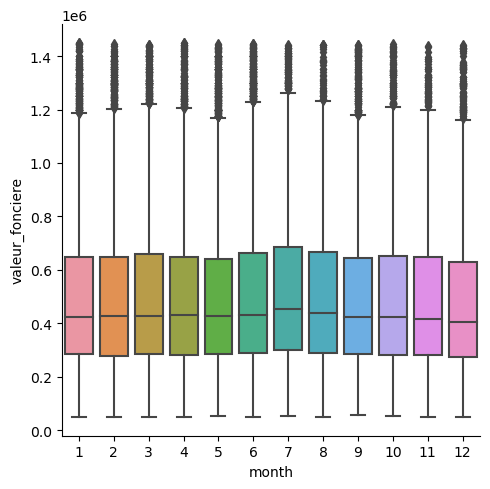

In [46]:
sns.catplot(x="month", y="valeur_fonciere", kind="box", data=dfDep)

Que cela soit en comparant month, year, day, les niveaux semblent relativement identiques mais on a beaucoup de points atypiques

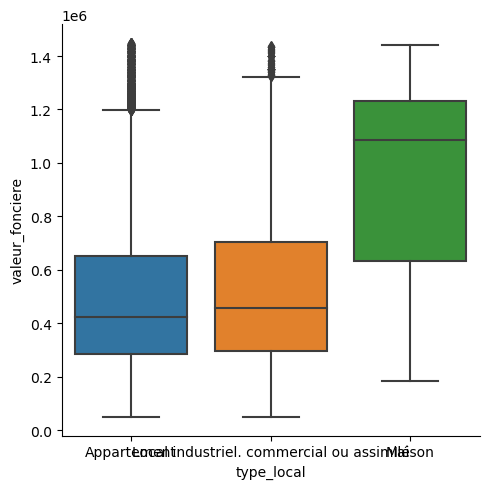

In [47]:
sns.catplot(x="type_local", y="valeur_fonciere", kind="box", data=dfDep, orient="v")

On peut constater que le prix des maisons est plus élevé que locaux industriels qui sont eux-mêmes à un niveau équivalent par rapport aux appartements en moyenne


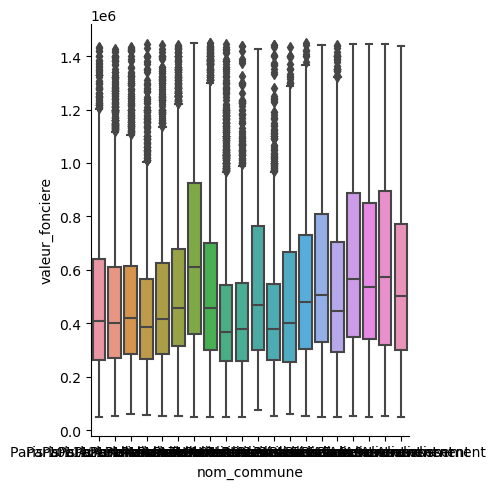

In [48]:
sns.catplot(x="nom_commune", y="valeur_fonciere", kind="box", orient="v",data=dfDep)

Les arrondissements semblent avoir un effet sur les prix

### Les variables quantitatives

In [49]:
dfDep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46482 entries, 1379722 to 4375222
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_mutation        46482 non-null  datetime64[ns]
 1   numero_disposition   46482 non-null  int64         
 2   valeur_fonciere      46482 non-null  float64       
 3   adresse_numero       46481 non-null  string        
 4   adresse_nom_voie     46481 non-null  string        
 5   nom_commune          46482 non-null  category      
 6   lot1_surface_carrez  28338 non-null  float64       
 7   nombre_lots          46482 non-null  int64         
 8   type_local           46159 non-null  category      
 9   surface_reelle_bati  46149 non-null  float64       
 10  longitude            46482 non-null  float64       
 11  latitude             46482 non-null  float64       
 12  adresse_complete     46481 non-null  string        
 13  month                46

<AxesSubplot:xlabel='surface_reelle_bati', ylabel='valeur_fonciere'>

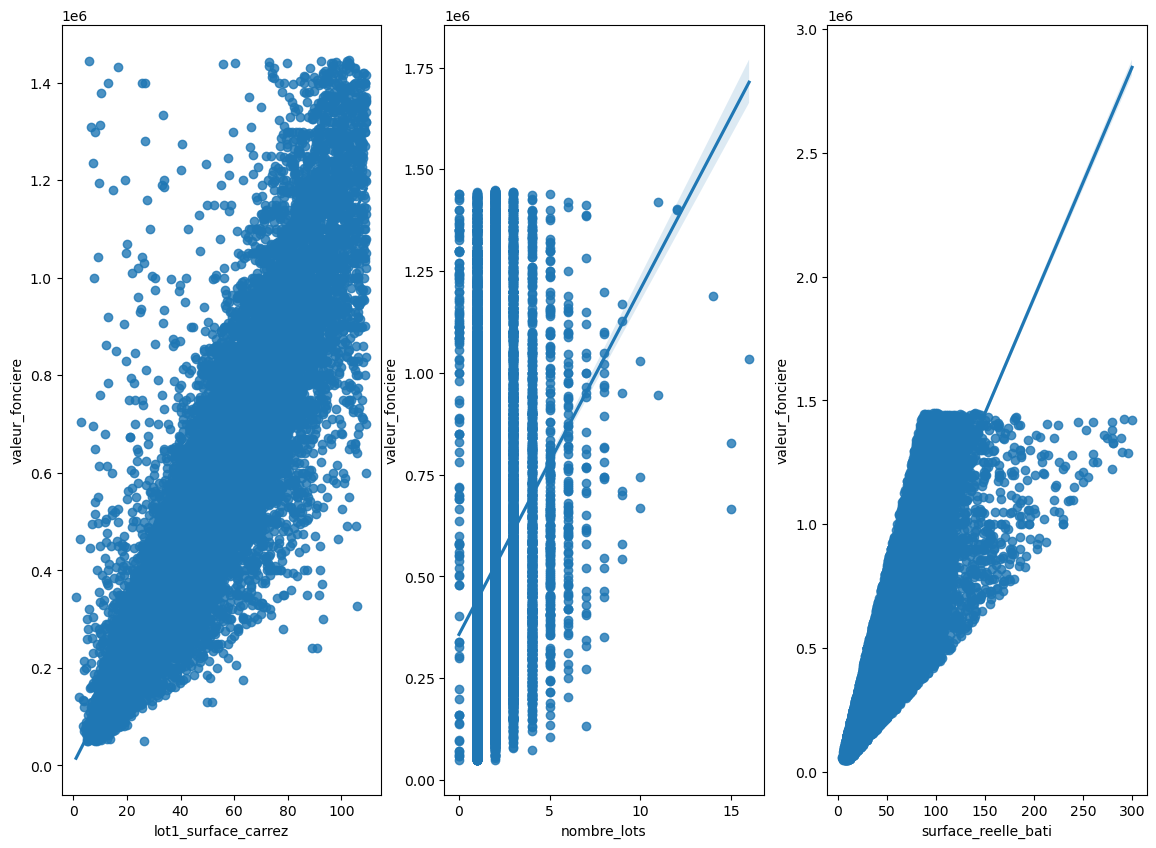

In [50]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(14,10)
sns.regplot(x="lot1_surface_carrez",y="valeur_fonciere",data=dfDep, ax=ax1)
sns.regplot(x="nombre_lots",y="valeur_fonciere",data=dfDep,ax=ax2)
sns.regplot(x="surface_reelle_bati",y="valeur_fonciere",data=dfDep,ax=ax3)
#sns.regplot(x="Prix m2",y="valeur_fonciere",data=dfDep,ax=ax4)

La valeur foncière augmente avec la surface, le nombre de lots, la surface réelle.

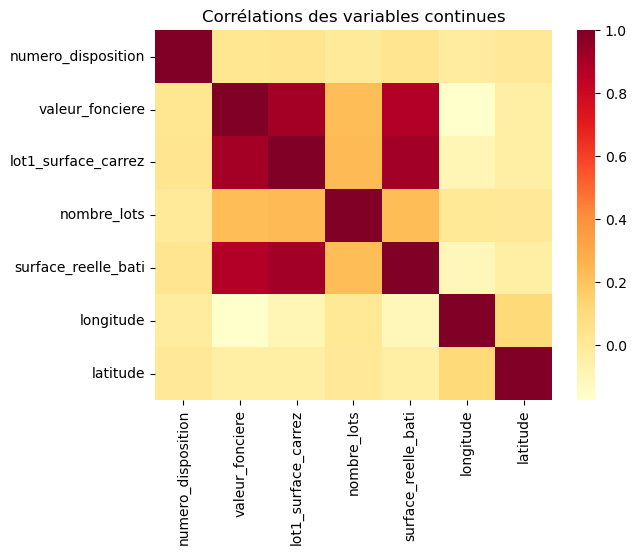

,numero_disposition,valeur_fonciere,lot1_surface_carrez,nombre_lots,surface_reelle_bati,longitude,latitude
numero_disposition,1.000000,0.024541,0.031832,-0.000242,0.031681,-0.017176,0.001994
valeur_fonciere,0.024541,1.000000,0.909703,0.227670,0.876837,-0.172863,-0.042408
lot1_surface_carrez,0.031832,0.909703,1.000000,0.235166,0.915587,-0.098811,-0.036007
nombre_lots,-0.000242,0.227670,0.235166,1.000000,0.227450,0.009932,0.003212
surface_reelle_bati,0.031681,0.876837,0.915587,0.227450,1.000000,-0.106381,-0.041606
longitude,-0.017176,-0.172863,-0.098811,0.009932,-0.106381,1.000000,0.113772
latitude,0.001994,-0.042408,-0.036007,0.003212,-0.041606,0.113772,1.000000


In [51]:
sns.heatmap(dfDep.corr(), cmap="YlOrRd")
plt.title("Corrélations des variables continues")
plt.show()
dfDep.corr()

La valeur foncière est fortement corrélée à la surface carrez ou réelle, faiblement au nombre de lots et aux coordonnées gps

### Conclusion sur l'analyse bivariée

La target est sensible : 
* à la surface réelle ou carrez
* au prix du m2
* à la commune
Par contre, elle ne semble pas tellement sensible au mois, jour, année.
La difficulté vient surtout du nombre de points atypiques importants.

## Analyse multivariée

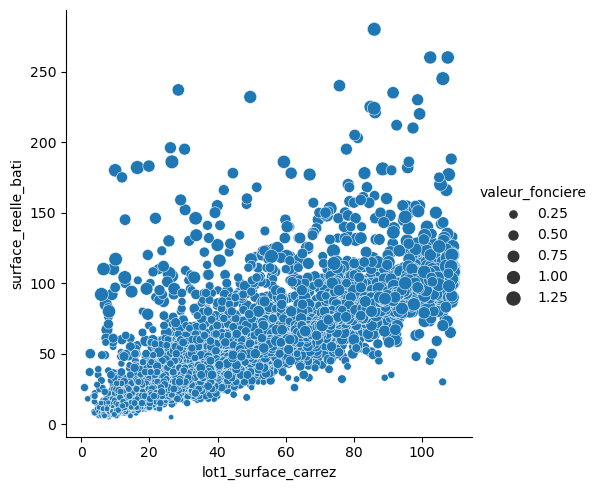

In [52]:
sns.relplot(x="lot1_surface_carrez", y="surface_reelle_bati", size="valeur_fonciere", sizes=(15, 100), data=dfDep);
#sns.catplot(x="lot1_surface_carrez", y="valeur_fonciere", hue="type_local",kind="bar",data=dfDep);

# Modelisation

## Preprocessing pour scikit-learn¶


In [53]:
dfDep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46482 entries, 1379722 to 4375222
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_mutation        46482 non-null  datetime64[ns]
 1   numero_disposition   46482 non-null  int64         
 2   valeur_fonciere      46482 non-null  float64       
 3   adresse_numero       46481 non-null  string        
 4   adresse_nom_voie     46481 non-null  string        
 5   nom_commune          46482 non-null  category      
 6   lot1_surface_carrez  28338 non-null  float64       
 7   nombre_lots          46482 non-null  int64         
 8   type_local           46159 non-null  category      
 9   surface_reelle_bati  46149 non-null  float64       
 10  longitude            46482 non-null  float64       
 11  latitude             46482 non-null  float64       
 12  adresse_complete     46481 non-null  string        
 13  month                46

### Gestion des données manquantes
Les méthodes numériques d'apprentissage ne gèrent pas les NaN ou null sur les valeurs numériques

In [54]:
dfDep.isna().sum()

date_mutation              0
numero_disposition         0
valeur_fonciere            0
adresse_numero             1
adresse_nom_voie           1
nom_commune                0
lot1_surface_carrez    18144
nombre_lots                0
type_local               323
surface_reelle_bati      333
longitude                  0
latitude                   0
adresse_complete           1
month                      0
day                        0
year                       0
dtype: int64

In [55]:
dfDep.drop(['lot1_surface_carrez'],inplace=True, axis=1)
dfDep.drop(dfDep[dfDep['surface_reelle_bati'].isna()].index, inplace=True, axis=0)

In [56]:
dfDep.isna().sum()

date_mutation          0
numero_disposition     0
valeur_fonciere        0
adresse_numero         0
adresse_nom_voie       0
nom_commune            0
nombre_lots            0
type_local             0
surface_reelle_bati    0
longitude              0
latitude               0
adresse_complete       0
month                  0
day                    0
year                   0
dtype: int64

### Construction des ensembles X et y à partir du dataframe

On peut enlever l'id qui est un champ purement technique ainsi que la date et tous les éléments de type string

In [57]:
X = dfDep.drop(["valeur_fonciere","date_mutation", "numero_disposition", "adresse_numero", "adresse_nom_voie","adresse_complete"], axis = 1)
y = dfDep["valeur_fonciere"]
print(f"Shape de X : {X.shape}")
print(f"Shape de y : {y.shape}")
X.head(5)

Shape de X : (46149, 9)
Shape de y : (46149,)


,nom_commune,nombre_lots,type_local,surface_reelle_bati,longitude,latitude,month,day,year
1379722,Paris 18e Arrondissement,2,Appartement,45.0,2.348168,48.884490,1,4,2022
1379725,Paris 3e Arrondissement,1,Appartement,42.0,2.362871,48.863374,1,6,2022
1379732,Paris 9e Arrondissement,3,Appartement,69.0,2.332324,48.880353,1,5,2022
1379734,Paris 10e Arrondissement,2,Appartement,33.0,2.362613,48.879658,1,5,2022
1379736,Paris 20e Arrondissement,2,Appartement,29.0,2.405513,48.872782,1,7,2022


### Preprocessing sur les variables catégorielles

In [58]:
categorical_features = X.columns[X.dtypes == "category"].tolist()
print(categorical_features)

['nom_commune', 'type_local', 'month', 'day', 'year']


Scikit-learn ne reconnait pas les objets de type DataFrame directement, notamment les types catégoriels. Il faut donc préparer nos données afin que les méthodes de scikit-learn puissent les interpréter. Scikit learn requiert un encodage numérique de ces variables. Nous allons donc devoir encoder nos variables explicatives catégorielles à l'aide de variables indicatrices.

In [59]:
df_dummies =  pd.get_dummies(X[categorical_features], drop_first=True)
X = pd.concat([X.drop(categorical_features, axis=1), df_dummies], axis=1)
X.head(5)

,nombre_lots,surface_reelle_bati,longitude,latitude,nom_commune_Paris 11e Arrondissement,nom_commune_Paris 12e Arrondissement,nom_commune_Paris 13e Arrondissement,nom_commune_Paris 14e Arrondissement,nom_commune_Paris 15e Arrondissement,nom_commune_Paris 16e Arrondissement,...,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,year_2022
1379722,2,45.0,2.348168,48.884490,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1379725,1,42.0,2.362871,48.863374,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1379732,3,69.0,2.332324,48.880353,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1379734,2,33.0,2.362613,48.879658,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1379736,2,29.0,2.405513,48.872782,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Train, Test
Nous utilisons scikit-learn pour faire le traitement et étant donné la volumétrie du jeu de données, nous allons prendre 80% pour le train et 20% pour le test

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)
print(f"Shape du X_train : {X_train.shape}")
print(f"Shape du y_train : {y_train.shape}")
print(f"Shape du X_test : {X_test.shape}")
print(f"Shape du y_test : {y_test.shape}")

Shape du X_train : (36919, 67)
Shape du y_train : (36919,)
Shape du X_test : (9230, 67)
Shape du y_test : (9230,)


## Preprocessing sur les variables numériques

In [61]:
numerical_features = dfDep.columns[(dfDep.dtypes == "int64")].tolist() + dfDep.columns[(dfDep.dtypes == "float64")].tolist()
print(numerical_features)

['numero_disposition', 'nombre_lots', 'valeur_fonciere', 'surface_reelle_bati', 'longitude', 'latitude']


Certaines méthodes d'apprentissage sont sensibles aux problèmes d'échelle sur les valeurs numériques. En preprocessing, on standardise les variables numériques en retranchant leur moyenne et en divisant par l'écart type via Scikit-learn. On réalise ce traitement sur l'ensemble d'apprentissage et on applique cette standardisation sur l'ensemble de test.

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_test_scaled.std()

0.9984830523020775

## Un modèle simple : la régression linéaire

Un premier modèle qui nous servira de *baseline*.

Nous allons aussi introduire l'instanciation sur les données *train*, et nous validerons **ENSUITE** sur les données *test*.

### Modèle de regression sur Train/Test
$$y =\sum_{i=1}^{n} a_i \times x_i + b$$

In [64]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_train_scaled, y_train)
y_trainPred = reg.predict(X_train_scaled)
y_testPred = reg.predict(X_test_scaled)
print(f"Score sur le train : {reg.score(X_train_scaled,y_train)}")
print(f"Score sur le test : {reg.score(X_test_scaled,y_test)}")

Score sur le train : 0.8017175728977979
Score sur le test : 0.8011631121444063


La régression linéaire donne des résultats et il n'y a pas de phénomène de sur-apprentissage.

## Coefficients de la régression linéaire

Un des avantages de la régression linéaire est que nous pouvons obtenir les coefficients associés à chacune des variables. Nous pouvons voir les coefficients qui ont un impact sur le nombre de vélos loués.

Regardons ces coefficients :

In [65]:
coefficients = pd.Series(reg.coef_.flatten(), index=X.columns).sort_values(ascending=False)
coefficients

surface_reelle_bati                                    249572.870033
nom_commune_Paris 6e Arrondissement                     16466.302201
latitude                                                14105.244694
nom_commune_Paris 5e Arrondissement                     13676.283050
nom_commune_Paris 7e Arrondissement                     13343.601169
                                                           ...      
nom_commune_Paris 15e Arrondissement                    -5217.255155
nom_commune_Paris 19e Arrondissement                   -11347.416919
nom_commune_Paris 18e Arrondissement                   -12725.454998
longitude                                              -26494.427558
type_local_Local industriel. commercial ou assimilé    -27947.820593
Length: 67, dtype: float64

In [66]:
print(f"ordonnee à l'origine : {reg.intercept_}")

ordonnee à l'origine : 499534.7393496575


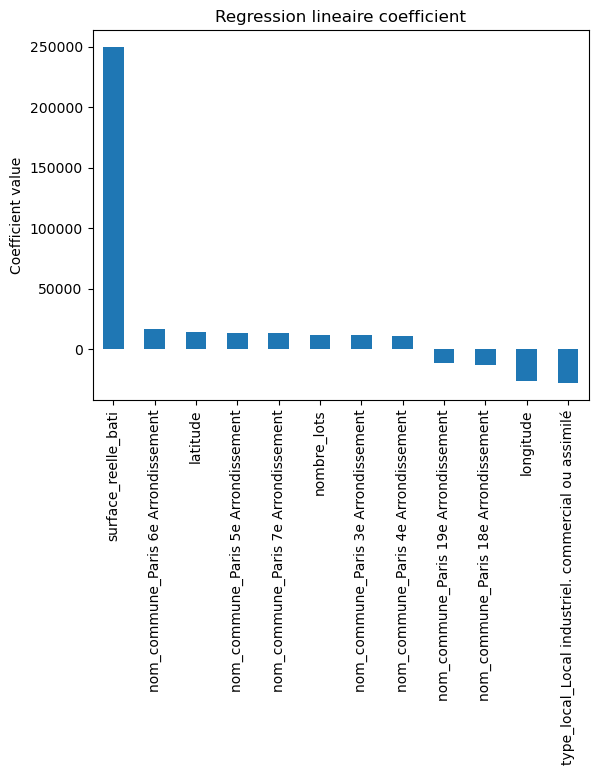

In [67]:
coefficients[np.abs(coefficients)>10000].plot(kind="bar")
plt.title("Regression lineaire coefficient")
plt.ylabel("Coefficient value")
plt.show()

On retrouve des éléments de l'exploration. Certaines communes tirent le prix vers le base comme le 18ème, 19ème au contraire du 6ème, ... L'élément le plus prépondérant est la surface réellement bati. La lattitude et la longitude s'opposent en termes d'effet.

### Evaluation de la régression avec différentes métriques

Nous allons regarder quelques métriques associées aux problématiques de régression :
* L'erreur maximum entre la prédiction et la réalité
* La moyenne des erreurs absolus entre la prédiction et la réalité
* La moyenne des erreurs au carré entre la prédiction et la réalité (MSE)
* Le score R2 qui est le coefficient de détermination en comparant MSE et la variance. Fonction renvoyée par la méthode score de Scikit Learn

In [68]:
from sklearn import metrics


def regression_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "max_error": metrics.max_error(y_true=y, y_pred=y_pred),
            "mean_absolute_error": metrics.mean_absolute_error(y_true=y, y_pred=y_pred),
            "mean_squared_error": metrics.mean_squared_error(y_true=y, y_pred=y_pred),
            "r2_score": metrics.r2_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

In [69]:
print("Regression metrics for train data")
print(regression_metrics(y_train, y_trainPred))
print("Regression metrics for test data")
print(regression_metrics(y_test, y_testPred))

Regression metrics for train data
      max_error  mean_absolute_error  mean_squared_error  r2_score
0  1.596970e+06         84687.636312        1.653548e+10  0.801718
Regression metrics for test data
      max_error  mean_absolute_error  mean_squared_error  r2_score
0  1.321491e+06         85090.635792        1.620885e+10  0.801163


Le modèle de regression linéaire n'est pas très bon quelque soit la métrique retenue.

## Arbre de décision et visions ensemblistes
### Arbre de décision


In [70]:
from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()
decisionTree.fit(X_train_scaled, y_train)
y_trainPred = decisionTree.predict(X_train_scaled)
y_testPred = decisionTree.predict(X_test_scaled)
print(f"Score sur le train de l'arbre de décision : {decisionTree.score(X_train_scaled,y_train)}")
print(f"Score sur le test de l'arbre de décision : {decisionTree.score(X_test_scaled,y_test)}")


Score sur le train de l'arbre de décision : 0.9998805881649797
Score sur le test de l'arbre de décision : 0.7388017288061995


In [71]:
print("Regression metrics with Decision Tree for train data")
print(regression_metrics(y_train, y_trainPred))
print("Regression metrics with Decision Tree for test data")
print(regression_metrics(y_test, y_testPred))

Regression metrics with Decision Tree for train data
   max_error  mean_absolute_error  mean_squared_error  r2_score
0   300000.0            64.969443        9.958180e+06  0.999881
Regression metrics with Decision Tree for test data
   max_error  mean_absolute_error  mean_squared_error  r2_score
0   946000.0         97767.314967        2.129245e+10  0.738802


On est dans un cas de surapprentissage puisque l'arbre de décision "fit"  à l'ensemble de train mais ne se généralise pas bien sur l'ensemble de test. Néanmoins la performance est moins bonne que la régression linéaire

In [72]:
print("Feature importances : \n{}".format(decisionTree.feature_importances_))

Feature importances : 
[7.31062170e-03 8.30174660e-01 4.15933383e-02 4.64322617e-02
 6.82821530e-04 1.37476963e-04 7.28972698e-04 3.99860587e-04
 8.31279554e-04 6.48748336e-04 3.36214529e-04 3.46015783e-04
 9.24931030e-05 4.44025190e-04 8.60628537e-04 1.99311832e-04
 3.50884209e-04 5.00911625e-04 9.56146354e-04 1.04568720e-03
 9.43015942e-04 5.55995538e-04 3.46907295e-04 6.91497800e-03
 8.86167653e-04 1.84471053e-03 1.45846599e-03 2.03381490e-03
 1.59430018e-03 2.15933498e-03 1.64563291e-03 9.14510984e-04
 1.72420933e-03 1.84079059e-03 1.26011864e-03 1.39113405e-03
 9.88349910e-04 8.90291501e-04 8.28216551e-04 1.26433359e-03
 1.12780406e-03 1.15156738e-03 1.32952122e-03 1.37251012e-03
 1.28719066e-03 1.04631903e-03 8.62356358e-04 1.21632694e-03
 1.14188273e-03 1.34819832e-03 1.50821083e-03 1.54137989e-03
 1.07209001e-03 1.05316618e-03 1.37326341e-03 8.67034781e-04
 1.39582806e-03 1.36789930e-03 1.27527962e-03 1.03851987e-03
 1.07011617e-03 1.12343730e-03 1.33766439e-03 1.47083238e-03
 

In [73]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)

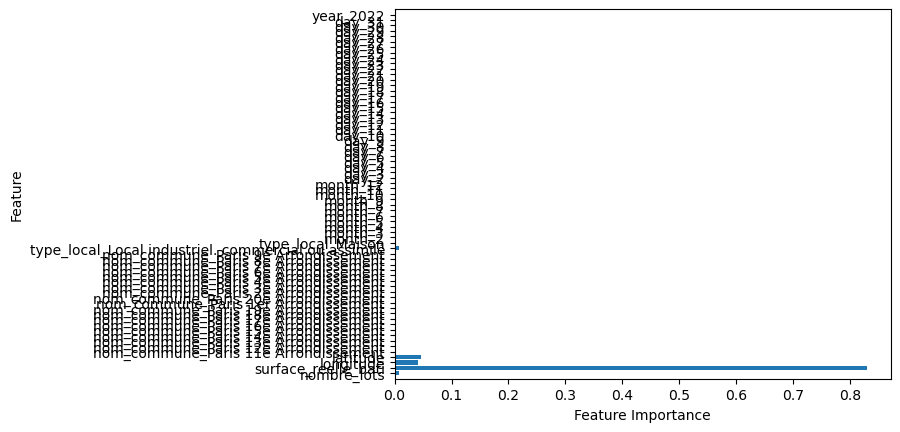

In [74]:
plot_feature_importances(decisionTree)

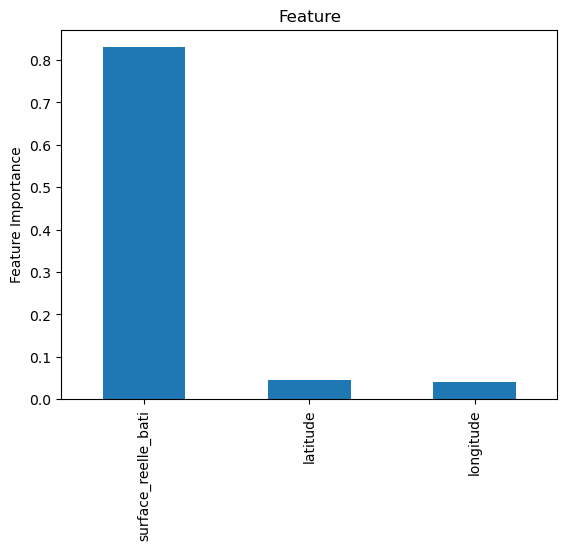

In [75]:
featuresImportance = pd.Series(decisionTree.feature_importances_.flatten(), index=X.columns).sort_values(ascending=False)
featuresImportance[(featuresImportance)>0.03].plot(kind="bar")
plt.title("Feature")
plt.ylabel("Feature Importance")
plt.show()

On retrouve la surface réelle et la position géographique du bien.

In [76]:
for depth in range(5,20):
    decisionTreeMaxDepth = DecisionTreeRegressor(max_depth=depth)
    decisionTreeMaxDepth.fit(X_train_scaled, y_train)
    print(f"Max depth : {depth}")
    print(f"Score sur le train de l'arbre de décision : {decisionTreeMaxDepth.score(X_train_scaled,y_train)}")
    print(f"Score sur le test de l'arbre de décision : {decisionTreeMaxDepth.score(X_test_scaled,y_test)}")

Max depth : 5
Score sur le train de l'arbre de décision : 0.8287761133628597
Score sur le test de l'arbre de décision : 0.8216097745011889
Max depth : 6
Score sur le train de l'arbre de décision : 0.8375911045161
Score sur le test de l'arbre de décision : 0.8298781113397137
Max depth : 7
Score sur le train de l'arbre de décision : 0.8475715134258025
Score sur le test de l'arbre de décision : 0.8345602372823613
Max depth : 8
Score sur le train de l'arbre de décision : 0.8571520065388156
Score sur le test de l'arbre de décision : 0.8392750992230951
Max depth : 9
Score sur le train de l'arbre de décision : 0.8667514157812605
Score sur le test de l'arbre de décision : 0.8381353778956921
Max depth : 10
Score sur le train de l'arbre de décision : 0.8771788808029217
Score sur le test de l'arbre de décision : 0.8385944419817379
Max depth : 11
Score sur le train de l'arbre de décision : 0.8884427238026404
Score sur le test de l'arbre de décision : 0.8318726663780615
Max depth : 12
Score sur le 

On observe assez vite le surapprentissage lorsqu'on augmente la profondeur de l'arbre

Avantages : 
* On peut contrôler la complexité de l'arbre en jouant sur des paramètres avec la profondeur ou des stratégies d'élagage
* Interprétabilité des décisions
* Pas de problématique de prise en compte des échelles différentes entre les variables (même si dans notre cas, nous travaillons sur des données standardisées)

Inconvénient majeur :
* Même en jouant sur la complexité de l'arbre, un arbre tend au surapprentissage et fournit de piètre performance de généralisation

### Random Forest


In [77]:
from sklearn.ensemble import RandomForestRegressor
nbTree = 100
print(f"Nombre d'arbres considérés : {nbTree}")
for depth in [5,10,15,20,30, 40]:
    randomForest = RandomForestRegressor(n_estimators=nbTree, random_state=2, max_depth=depth)
    randomForest.fit(X_train_scaled, y_train)
    print(f"--- Max depth : {depth}")
    print(f"---------Score sur le train avec RandomForest : {randomForest.score(X_train_scaled,y_train)}")
    print(f"---------Score sur le test avec RandomForest : {randomForest.score(X_test_scaled,y_test)}")

Nombre d'arbres considérés : 100
--- Max depth : 5
---------Score sur le train avec RandomForest : 0.8359706488563999
---------Score sur le test avec RandomForest : 0.8289525406733299
--- Max depth : 10
---------Score sur le train avec RandomForest : 0.8896458202070148
---------Score sur le test avec RandomForest : 0.8595626102602516
--- Max depth : 15
---------Score sur le train avec RandomForest : 0.9407613378235083
---------Score sur le test avec RandomForest : 0.86188618552186
--- Max depth : 20
---------Score sur le train avec RandomForest : 0.9681499184443108
---------Score sur le test avec RandomForest : 0.8596451915853982
--- Max depth : 30
---------Score sur le train avec RandomForest : 0.979733060427418
---------Score sur le test avec RandomForest : 0.858242085415685
--- Max depth : 40
---------Score sur le train avec RandomForest : 0.9803220072381146
---------Score sur le test avec RandomForest : 0.8581958142919872


On observe avec Random Forest une amélioration du score fonction de la profondeur considérées avec un surapprentissage de plus en plus important. 

### GridSearch et Validation croisée

Nous allons creuser un peu plus loin afin d'améliorer RandomForest en optimisant les hyperparamètres du modèle. Pour ce faire nous allons procéder par validation croisée avec 5 plis sur l'ensemble d'apprentissage. 
A l'aide de celle-ci, nous allons chercher quel(s) paramètre(s) nous donne(nt) le meilleur score et enfin nous évaluerons la qualité du modèle sur le jeu de données test.

Les paramètres que nous allons chercher à optimiser dans RandomForest sont :
* le paramètre max_depth qui correspond à la profondeur de l'arbre 
* le nombre d'arbres à considérer dans la forêt
* le nombre de features maximale à considérer

In [78]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs
params = [{"max_depth": [10,15,20], "n_estimators": [100,200,300,500], "max_features": [12, 15, 20, 25]}]

gridSearchCV = GridSearchCV(
    RandomForestRegressor(),
    params,
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearchCV.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [10, 15, 20],
                          'max_features': [12, 15, 20, 25],
                          'n_estimators': [100, 200, 300, 500]}],
             return_train_score=True)

In [79]:
print("Score sur le test : {:.2f}".format(gridSearchCV.score(X_test_scaled,y_test)))

Score sur le test : 0.86


In [80]:
print("Best parameters : {}".format(gridSearchCV.best_params_))
print("Best cross-validation score : {:.2f}".format(gridSearchCV.best_score_))

Best parameters : {'max_depth': 15, 'max_features': 25, 'n_estimators': 300}
Best cross-validation score : 0.86


In [81]:
print("Best estimator:\n{}".format(gridSearchCV.best_estimator_))

Best estimator:
RandomForestRegressor(max_depth=15, max_features=25, n_estimators=300)


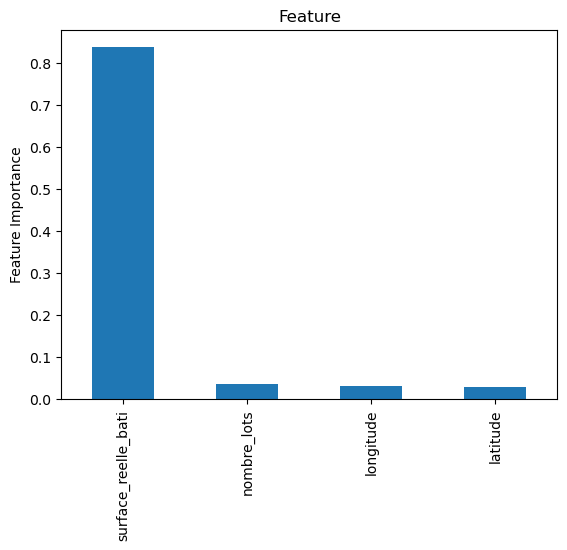

In [82]:
featuresImportance = pd.Series(gridSearchCV.best_estimator_.feature_importances_.flatten(), index=X.columns).sort_values(ascending=False)
featuresImportance[(featuresImportance)>0.03].plot(kind="bar")
plt.title("Feature")
plt.ylabel("Feature Importance")
plt.show()

A travers une validation croisée et un grid search, on obtient un paramétrage via Random Forest et on peut visualiser les variables qui ont de l'importance. On retrouve des variables explicatives en lien avec notre analyse exploratoire. On est aussi dans un cas où il n'y a pas de surapprentissage. 

In [83]:
y_testPred = gridSearchCV.best_estimator_.predict(X_test_scaled)
print("Regression metrics pour la forêt aléatoire optimisée for test data")
print(regression_metrics(y_test, y_testPred))

Regression metrics pour la forêt aléatoire optimisée for test data
       max_error  mean_absolute_error  mean_squared_error  r2_score
0  679658.806844         71698.668552        1.123676e+10  0.862157


In [84]:
y_trainPred = gridSearchCV.best_estimator_.predict(X_train_scaled)
print("Regression metrics pour la forêt aléatoire optimisée for train data")
print(regression_metrics(y_train, y_trainPred))

Regression metrics pour la forêt aléatoire optimisée for train data
       max_error  mean_absolute_error  mean_squared_error  r2_score
0  543240.872239         55100.938868        6.246179e+09    0.9251


## Sauvegarde du modèle et appel en mode API

In [117]:
from API.model import Model,TypeRegression
from API.buildModel import trainAndRun,downloadModel
modelRandomForest = Model(1)
modelRandomForest.instanciation()
trainAndRun(modelRandomForest, X_train_scaled, y_train, X_test_scaled, y_test)
downloadModel(modelRandomForest)    

ImportError: cannot import name 'TypeRegression' from 'model' (C:\Users\antho\Documents\GitHub\Predict_Immo\src\model.py)

In [130]:
import requests
import json
X.reset_index(inplace=True)
print(X.head(5))
url = 'http://127.0.0.1:5000/RandomForest'
print('Taille de la requete : ',X_test_scaled.shape)
params = {'data': json.dumps(X_test_scaled.tolist())}
predict = requests.post(url,params).json()
# Make array from the list
y_predict = np.array(predict)
print(y_predict)

     index  nombre_lots  surface_reelle_bati  longitude   latitude  \
0  1379722            2                 45.0   2.348168  48.884490   
1  1379725            1                 42.0   2.362871  48.863374   
2  1379732            3                 69.0   2.332324  48.880353   
3  1379734            2                 33.0   2.362613  48.879658   
4  1379736            2                 29.0   2.405513  48.872782   

   nom_commune_Paris 11e Arrondissement  nom_commune_Paris 12e Arrondissement  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   nom_commune_Paris 13e Arrondissement  nom_commune_Paris 14e Arrondissement  \
0          

# Conclusion

## Sur le travail réalisé
* L'analyse univariée et multivariée ont permis de mettre en évidence des liens entre les variables explicatives et à expliquer
* Le featuring Ingeenering a été un travail réalisé sur les dates pour essayer de voir les liens avec la variable à prédire.
* Les modèles linéaires donne des résultats pas très intéressants sur certaines métriques
* Un modèle basé sur des arbres de décision permet d'obtenir des meilleurs résultats par rapport à la regression linéaire. Une optimisation des paramètres a pu être mise en oeuvre via validation croisée et grille de recherche

## Sur les perspectives
* Sur le code : la mise en place de Pipe avec l'utilisation de OneHotEncoder et StandardScaler.
* Sur les modèles : tester d'autres modèles pour améliorer la prévision. On peut penser à une régression polynomiale ou boosting d'arbres de régression, ou des modèles traitant spécifiquement de séries temporelles.
* Un traitement des points atypiques a été réalisé avec aussi de l'imputation mais il faudrait passer plus de temps sur la compréhension des données.